In [1]:
%matplotlib inline
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
records = pd.read_csv('../../data/cleaned_texts_oct19_2016.tsv', sep='\t')
records = records[records.pub_year > 1699]
records = records[records.pub_year < 1800]

In [3]:
records.replace(
    'el ingenioso hidalgo don qvixote de la mancha,cervantes saavedra, miguel de',
    'el ingenioso hidalgo don quixote de la mancha,cervantes saavedra, miguel de',
    inplace=True
)

/home/davebshow/.virtualenvs/scientific3/lib/python3.4/site-packages/pandas/core/common.py:449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


In [14]:
records.replace(
    'vida y hechos del ingenioso cavallero don quixote de la mancha,cervantes saavedra, miguel de',
    'vida y hechos del ingenioso caballero don quixote de la mancha,cervantes saavedra, miguel de',
    inplace=True
)

/home/davebshow/.virtualenvs/scientific3/lib/python3.4/site-packages/pandas/core/common.py:449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


In [15]:
records.replace(
    'vida, y hechos del ingenioso cavallero don quixote de la mancha,cervantes saavedra, miguel de',
    'vida y hechos del ingenioso caballero don quixote de la mancha,cervantes saavedra, miguel de',
    inplace=True
)

/home/davebshow/.virtualenvs/scientific3/lib/python3.4/site-packages/pandas/core/common.py:449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


In [26]:
records[(records.pub_year == 1777) & (records.text_slug == 'vida y hechos del ingenioso caballero don quixote de la mancha,cervantes saavedra, miguel de')]

,Unnamed: 0,control_number,title,uniform_title,author,publisher,pub_location,pub_year,translation,prev_language,slug,canonical_city,canonical_country,text_slug
527494,801315,433296808,vida y hechos del ingenioso caballero don quix...,don quijote de la mancha,"cervantes saavedra, miguel de",a costa de la real compania de impresores y li...,madrid,1777,NaN,NaN,"madrid,spain",madrid,spain,vida y hechos del ingenioso caballero don quix...
1948588,2961986,688379313,vida y hechos del ingenioso caballero don quix...,don quijote de la mancha,"cervantes saavedra, miguel de",a costa de la real compania de impresores y li...,madrid,1777,NaN,NaN,"madrid,spain",madrid,spain,vida y hechos del ingenioso caballero don quix...
2057410,3128300,700151327,vida y hechos del ingenioso caballero don quix...,don quijote de la mancha,"cervantes saavedra, miguel de","a costa de la real compania de impresores, y l...",madrid,1777,NaN,NaN,"madrid,spain",madrid,spain,vida y hechos del ingenioso caballero don quix...
3214155,4888686,807213535,vida y hechos del ingenioso caballero don quix...,NaN,"cervantes saavedra, miguel de",a costa de la real compania de impresores y li...,madrid,1777,NaN,NaN,"madrid,spain",madrid,spain,vida y hechos del ingenioso caballero don quix...
4555492,6928648,700151402,vida y hechos del ingenioso caballero don quix...,don quijote de la mancha,"cervantes saavedra, miguel de",a costa de la real compania de impresores y li...,madrid,1777,NaN,NaN,"madrid,spain",madrid,spain,vida y hechos del ingenioso caballero don quix...
5808424,8837955,700151401,vida y hechos del ingenioso caballero don quix...,don quijote de la mancha,"cervantes saavedra, miguel de",a costa de la real compania de impresores y li...,madrid,1777,NaN,NaN,"madrid,spain",madrid,spain,vida y hechos del ingenioso caballero don quix...


In [16]:
records.head(1)

,Unnamed: 0,control_number,title,uniform_title,author,publisher,pub_location,pub_year,translation,prev_language,slug,canonical_city,canonical_country,text_slug
91,117,11003743,historia de las guerras de los judios y de la ...,NaN,"josephus, flavius",en la oficina de don benito cano,madrid,1791,NaN,NaN,"madrid,spain",madrid,spain,historia de las guerras de los judios y de la ...


In [17]:
len(records)

87907

In [18]:
plt.rcParams['figure.figsize'] = (16.0, 8.0)

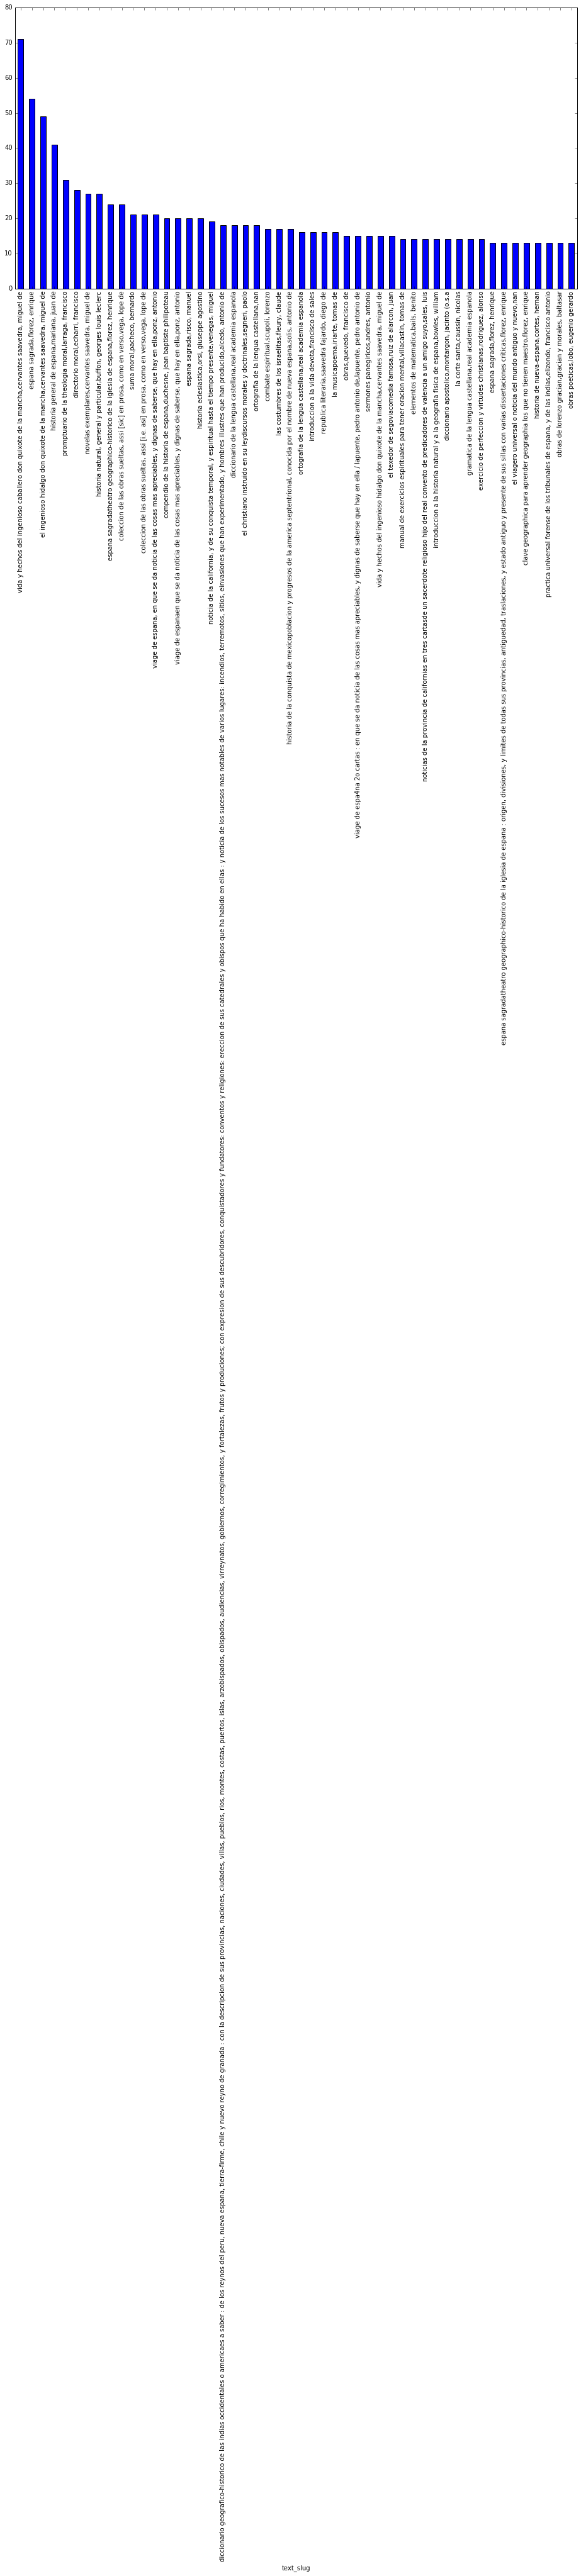

In [19]:
records.groupby('text_slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:50].plot(kind="bar")

In [8]:
len(records.groupby('text_slug').count()['control_number'])

74820

In [9]:
d = {k: len(v) for k, v in records.groupby("text_slug").groups.items()}

def prob_dist(d):
    probs = {}
    for k, v in d.items():
        probs.setdefault(v, 0)
        probs[v] += 1
    return probs


probs = prob_dist(d)

In [10]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)

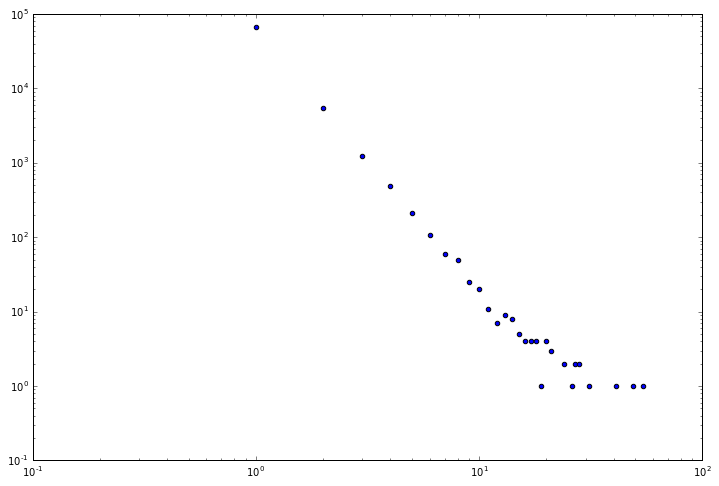

In [11]:
plt.xscale("log")
plt.yscale("log")
plt.scatter(list(probs.keys()), list(probs.values()))

In [12]:
top_slugs = records.groupby('text_slug').count()['control_number'].sort_values(inplace=False, ascending=False).ix[:50].index

In [13]:
top_slugs

Index(['espana sagrada,florez, enrique',
       'el ingenioso hidalgo don quixote de la mancha,cervantes saavedra, miguel de',
       'historia general de espana,mariana, juan de',
       'promptuario de la theologia moral,larraga, francisco',
       'directorio moral,echarri, francisco',
       'vida y hechos del ingenioso cavallero don quixote de la mancha,cervantes saavedra, miguel de',
       'novelas exemplares,cervantes saavedra, miguel de',
       'historia natural, general y particular,buffon, georges louis leclerc',
       'vida, y hechos del ingenioso cavallero don quixote de la mancha,cervantes saavedra, miguel de',
       'coleccion de las obras sueltas, assi [sic] en prosa, como en verso,vega, lope de',
       'espana sagradatheatro geographico-historico de la iglesia de espana,florez, henrique',
       'coleccion de las obras sueltas, assi [i.e. asi] en prosa, como en verso,vega, lope de',
       'viage de espana, en que se da noticia de las cosas mas apreciables, y digna

In [17]:
top_producers = records[records.text_slug.isin(top_slugs)]

In [18]:
group_top_producers = top_producers.sort_values('pub_year').groupby(['text_slug', 'pub_year']).count()['control_number']

In [19]:
top_producer_df1 = pd.DataFrame({
    'tratado del amor de dios,fonseca, cristobal de': group_top_producers.ix['tratado del amor de dios,fonseca, cristobal de'],
    'la perfecta casada,leon, luis de': group_top_producers.ix['la perfecta casada,leon, luis de'],
    'breuissima relacion de la destruycion de las indias,casas, bartolome de las': group_top_producers.ix['breuissima relacion de la destruycion de las indias,casas, bartolome de las'],
    'de los nombres de christoen tres libros,leon, luis de': group_top_producers.ix['de los nombres de christoen tres libros,leon, luis de'],
    'vocabulario en lengua castellana y mexicana,molina, alonso de': group_top_producers.ix['vocabulario en lengua castellana y mexicana,molina, alonso de'],
    'orlando furioso,ariosto, lodovico': group_top_producers.ix['orlando furioso,ariosto, lodovico'],
    'arte de la lengua mexicana y castellana,molina, alonso de': group_top_producers.ix['arte de la lengua mexicana y castellana,molina, alonso de'],
    'las siete partidas del sabio rey don alonso el nono,nan': group_top_producers.ix['las siete partidas del sabio rey don alonso el nono,nan'],
    'tragicomedia de calisto y melibea': group_top_producers.ix['tragicomedia de calisto y melibea. enla ql se cotiene de mas de su agradable dulce estilo muchas sentencias filosofales: auisosmuy necessarios a macebos ... nueuamente anadido el tractado de centurio. [with woodcuts.] g.l,nan'],
    'oratorio de religiosos y exercicio de virtuosos,guevara, antonio de': group_top_producers.ix['oratorio de religiosos y exercicio de virtuosos,guevara, antonio de'],
    }).fillna(0)

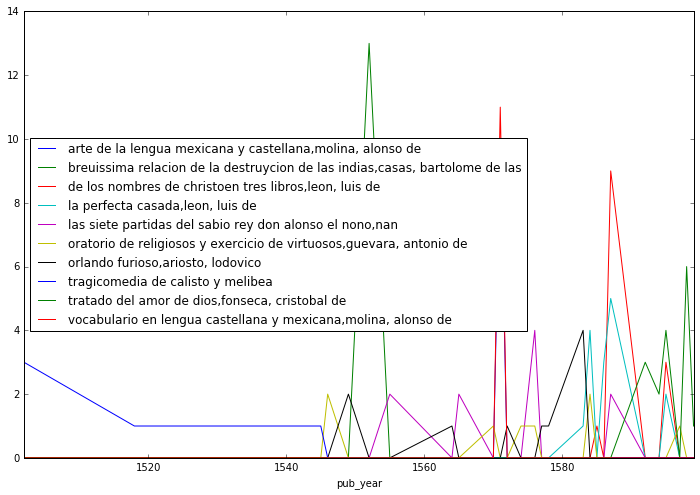

In [20]:
top_producer_df1.plot()

In [ ]:
top_producer_df5 = pd.DataFrame({
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
    '': group_top_producers.ix[''],
}).fillna(0)